In [17]:
import numpy as np
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
np.random.seed(10)
%matplotlib inline

## **Creating the dataset**

In [18]:
x1 = np.random.normal(5,1,500)
x2 = np.random.normal(6,1,500)
x3 = np.random.normal(10,1,500)
x4 = np.random.normal(12,1,500)

x = np.stack([x1,x2],axis = 1)
x13 = np.concatenate([x1,x3],axis = 0)
x24 = np.concatenate([x2,x4],axis = 0)

x = np.stack([x13,x24],axis = 1)

y = [int(a[0] >=min(x3) and a[1] >=min(x4)) for a in x]
y = np.array(y)
y[y == 0] = -1

pos = x[y==1]
neg = x[y==-1]


## **Visualizing the dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


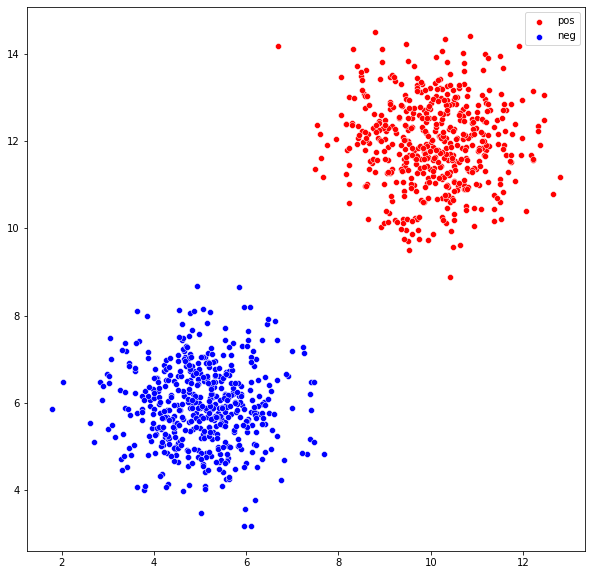

In [23]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(pos[:,0],pos[:,1],label='pos',color = 'red')
sns.scatterplot(neg[:,0],neg[:,1],label='neg',color = 'blue')
plt.show()

## **Creating and training the model**

In [ ]:
x = tf.cast(x,dtype = tf.float32)
# w = tf.random.normal(shape = (2,1),dtype = tf.float32)
# final = tf.linalg.matmul(x,w)

def model():
  inputs = tf.keras.layers.Input(shape = (2,))
  outputs = tf.keras.layers.Dense(1)(inputs)

  model = tf.keras.Model(inputs = inputs,outputs = outputs)
  model.compile(loss = 'hinge',optimizer = 'adam')
  return model

m = model()
m.fit(x,y,epochs = 1000)

print(m.get_weights())



## **Support vectors**

In [21]:
pred = m.predict(x)
print(pred.shape,x.shape)

sv = []
for ind,elem in enumerate(pred):
  if elem >= -1 and elem <= 1:
    sv.append(x[ind])


sv = np.array(sv)
print(sv)
sv = np.concatenate([sv,np.zeros((1000 - len(sv),2))],axis = 0)
print(sv,sv.shape)

(1000, 1) (1000, 2)
[[ 5.8482084  8.662578 ]
 [ 6.614408   7.869988 ]
 [ 7.2250495  7.2718205]
 [ 6.085227   8.195597 ]
 [ 6.462711   7.9156528]
 [ 7.2418666  7.1450086]
 [ 7.666826  11.173928 ]
 [ 8.220203  10.568634 ]
 [ 9.524355   9.496333 ]
 [ 8.923809  10.033795 ]
 [ 8.647674  10.223385 ]]
[[5.84820843 8.66257763]
 [6.61440802 7.86998796]
 [7.2250495  7.27182055]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]] (1000, 2)


## **Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


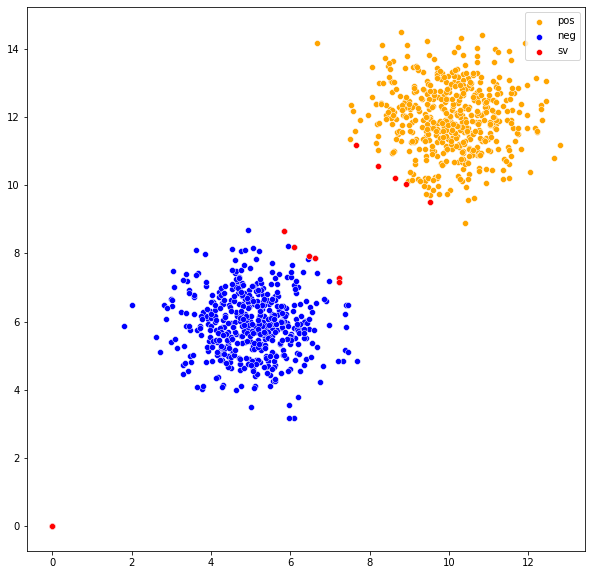

In [24]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(pos[:,0],pos[:,1],label='pos',color = 'orange')
sns.scatterplot(neg[:,0],neg[:,1],label='neg',color = 'blue')
sns.scatterplot(sv[:,0],sv[:,1],label='sv',color = 'red')
plt.show()